<a href="https://colab.research.google.com/github/Ashubapun/Time-Series-Using-Stack-LSTM/blob/main/Time_Series_StackLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader as pdr
import yfinance as yf

In [ ]:
start = '2013-01-01'
end = '2023-01-01'

# df = pdr.DataReader('AAPL', 'yahoo', start, end)
# df

df = yf.download('AAPL', start = start, end = end)
df = df.round(2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.78,19.82,19.34,19.61,16.81,560518000
2013-01-03,19.57,19.63,19.32,19.36,16.60,352965200
2013-01-04,19.18,19.24,18.78,18.82,16.14,594333600
2013-01-07,18.64,18.90,18.40,18.71,16.04,484156400
2013-01-08,18.90,19.00,18.62,18.76,16.09,458707200
...,...,...,...,...,...,...
2022-12-23,130.92,132.42,129.64,131.86,131.48,63814900
2022-12-27,131.38,131.41,128.72,130.03,129.65,69007800
2022-12-28,129.67,131.03,125.87,126.04,125.67,85438400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,62.383495,63.087629,61.696644,62.416632,60.460949,1.713540e+08
std,48.682950,49.322162,48.051043,48.709776,49.105721,1.250497e+08
min,13.860000,14.270000,13.750000,13.950000,12.030000,3.519590e+07
25%,26.972500,27.222500,26.700000,26.982500,24.602500,9.188698e+07
50%,41.355000,41.870000,40.890000,41.310000,39.400000,1.301368e+08
75%,91.272500,92.882500,90.825000,91.525000,89.857500,2.045116e+08
max,182.630000,182.940000,179.120000,182.010000,180.430000,1.460852e+09


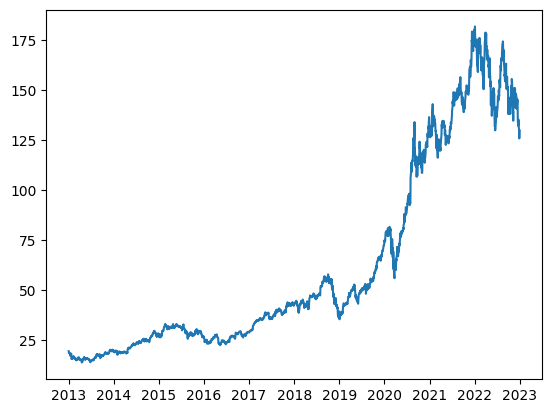

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

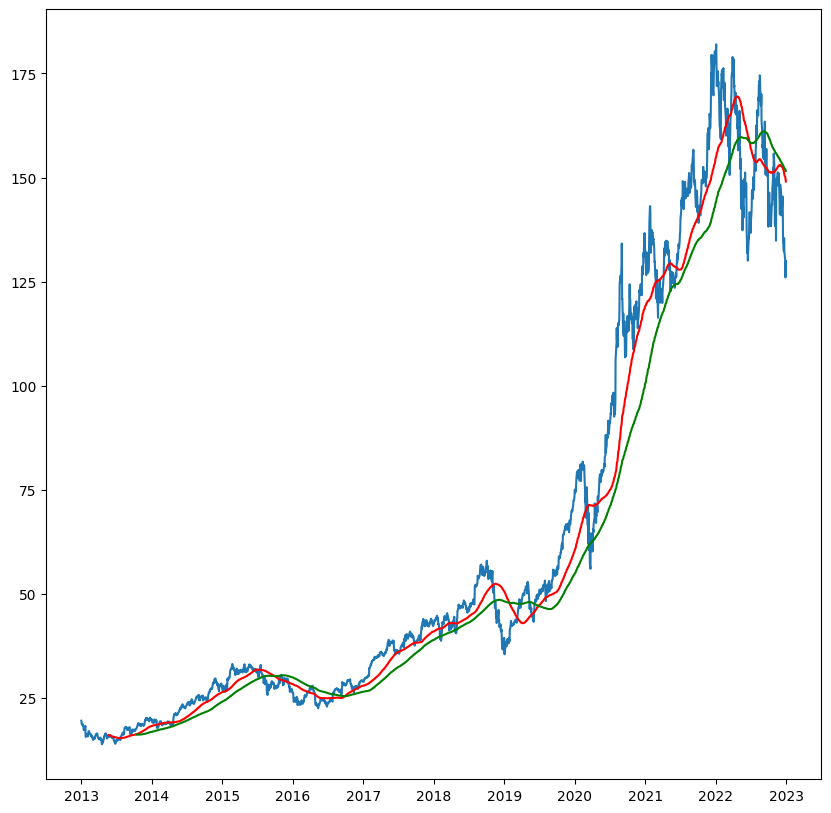

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2518, 6)

In [ ]:
# Split data into training and testing
data_train = pd.DataFrame(df['Close'][ : int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7) : ])

In [ ]:
data_train

,Close
Date,
2013-01-02,19.61
2013-01-03,19.36
2013-01-04,18.82
2013-01-07,18.71
2013-01-08,18.76
...,...
2019-12-24,71.07
2019-12-26,72.48
2019-12-27,72.45


In [ ]:
data_test

,Close
Date,
2020-01-02,75.09
2020-01-03,74.36
2020-01-06,74.95
2020-01-07,74.60
2020-01-08,75.80
...,...
2022-12-23,131.86
2022-12-27,130.03
2022-12-28,126.04


In [ ]:
data_train.shape , data_test.shape

((1762, 1), (756, 1))

In [ ]:
# Scaling down the data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))   # which is default parameter

In [ ]:
data_training = scaler.fit_transform(data_train)
data_testing = scaler.fit_transform(data_test)

In [ ]:
data_train

,Close
Date,
2013-01-02,19.61
2013-01-03,19.36
2013-01-04,18.82
2013-01-07,18.71
2013-01-08,18.76
...,...
2019-12-24,71.07
2019-12-26,72.48
2019-12-27,72.45


In [ ]:
data_test

,Close
Date,
2020-01-02,75.09
2020-01-03,74.36
2020-01-06,74.95
2020-01-07,74.60
2020-01-08,75.80
...,...
2022-12-23,131.86
2022-12-27,130.03
2022-12-28,126.04


In [ ]:
data_train.shape , data_test.shape

((1762, 1), (756, 1))

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
  x_train.append(data_training[i-100:i])
  y_train.append(data_training[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape, y_train.shape

((1662, 100, 1), (1662,))

**Modelling**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model  = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 27s 393ms/step - loss: 0.0305
Epoch 2/50
52/52 [==============================] - 19s 364ms/step - loss: 0.0066
Epoch 3/50
52/52 [==============================] - 26s 497ms/step - loss: 0.0060
Epoch 4/50
52/52 [==============================] - 27s 513ms/step - loss: 0.0055
Epoch 5/50
52/52 [==============================] - 22s 420ms/step - loss: 0.0050
Epoch 6/50
52/52 [==============================] - 26s 503ms/step - loss: 0.0047
Epoch 7/50
52/52 [==============================] - 21s 412ms/step - loss: 0.0042
Epoch 8/50
52/52 [==============================] - 27s 530ms/step - loss: 0.0038
Epoch 9/50
52/52 [==============================] - 24s 463ms/step - loss: 0.0042
Epoch 10/50
52/52 [==============================] - 18s 351ms/step - loss: 0.0039
Epoch 11/50
52/52 [==============================] - 27s 522ms/step - loss: 0.0041
Epoch 12/50
52/52 [==============================] - 19s 376ms/step - loss: 0.0035
Epoch 13/50
5

In [ ]:
model.save('keras_lstm.h5')

In [ ]:
data_train

,Close
Date,
2013-01-02,19.61
2013-01-03,19.36
2013-01-04,18.82
2013-01-07,18.71
2013-01-08,18.76
...,...
2019-12-24,71.07
2019-12-26,72.48
2019-12-27,72.45


In [ ]:
past_100_days = data_train.tail(100)
final_df = past_100_days.append(data_test, ignore_index = True)

<ipython-input-71-01271505e5eb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index = True)


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(856, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# Prediction
y_pred = model.predict(x_test)
y_pred.shape

24/24 [==============================] - 3s 95ms/step


(756, 1)

In [ ]:
y_test.shape

(756,)

In [ ]:
scaler.scale_

array([0.00758208])

In [ ]:
y_pred = y_pred * (1/0.00758208)
y_test = y_test * (1/0.00758208)

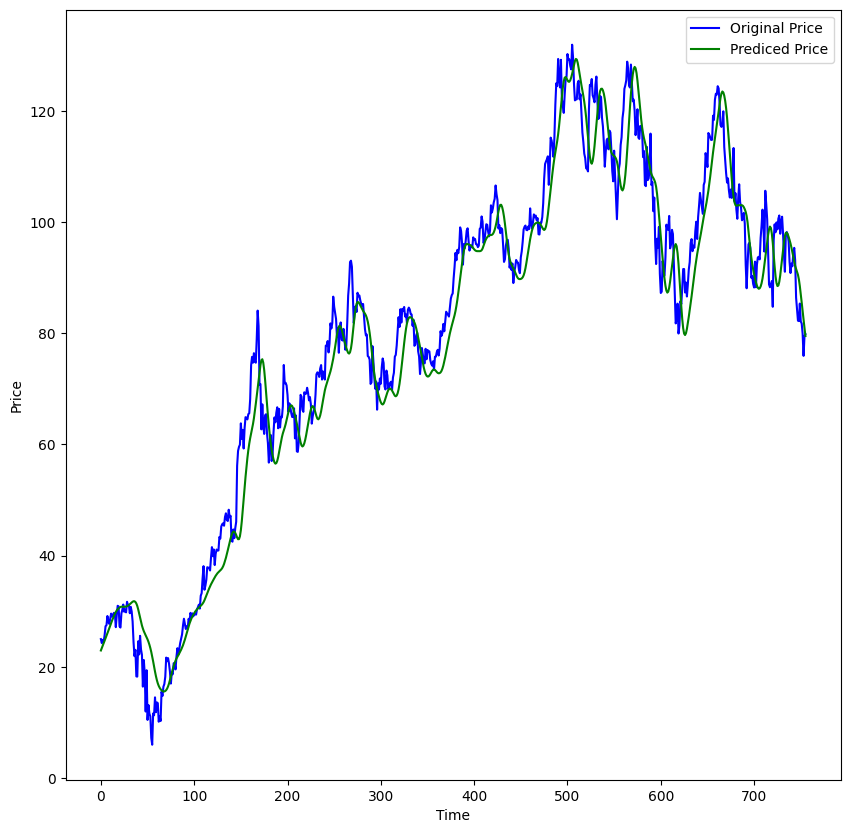

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'g', label = 'Prediced Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()